In [74]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from scipy import stats

In [75]:
df = pd.read_csv('/Users/collinswestnedge/programming/Metis_Online/project_02/clean_data/all_neighborhoods_clean.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,lat,long,Type,Year built,Heating,Cooling,Parking,HOA,Total Price,Address,...,Bedrooms,Bathrooms,Full bathrooms,neighborhood_stats,URL,Half bathrooms,zip,median_nhv,Parking_Binned,address_clean
0,41.798761,-87.588963,Condo,1910.0,Gas,Central,NaN,No,249900.0,"5329 S Harper Ave #2, Chicago, IL 60615",...,2.0,2.0,2.0,Home values in Hyde Park have risen 0.6 % (↑) ...,https://www.zillow.com/homedetails/5329-S-Harp...,0,60615,396553,No,5329 S Harper Ave Chicago IL 60615
1,42.010591,-87.820290,Single Family,1957.0,Forced air,Central,2 spaces,Yes,399000.0,"7144 N Ozark Ave, Chicago, IL 60631",...,2.0,2.0,2.0,Home values in Edison Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/7144-N-Ozar...,0,60631,356353,Yes,"7144 N Ozark Ave, Chicago, IL 60631"
2,42.006244,-87.672813,Condo,2007.0,Forced air,Central,NaN,No,169898.0,"1673 W Farwell Ave APT 1S, Chicago, IL 60626",...,2.0,1.0,1.0,Home values in Rogers Park have risen 0.6 % (↑...,https://www.zillow.com/homedetails/1673-W-Farw...,0,60626,226102,No,1673 W Farwell Ave Chicago IL 60626
3,41.863777,-87.624549,Condo,2008.0,Gas,Central,2 spaces,No,489900.0,"1400 S Michigan Ave APT 2203, Chicago, IL 60605",...,2.0,2.0,2.0,Home values in South Loop have risen 0.6 % (↑)...,https://www.zillow.com/homedetails/1400-S-Mich...,0,60605,376901,Yes,1400 S Michigan Ave Chicago IL 60605
4,41.700669,-87.676906,Single Family,1971.0,Forced air,Central,4 spaces,Yes,389000.0,"10606 S Leavitt St, Chicago, IL 60643",...,3.0,3.0,2.0,Home values in Beverly have risen 0.6 % (↑) ov...,https://www.zillow.com/homedetails/10606-S-Lea...,1,60643,346385,Yes,"10606 S Leavitt St, Chicago, IL 60643"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,41.714684,-87.754065,Condo,2005.0,Forced air,Central,1 space,No,168999.0,"9440 S 51st Ave APT 502, Oak Lawn, IL 60453",...,1.0,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9440-S-51st...,0,60453,210544,Yes,9440 S 51st Ave Oak Lawn IL 60453
2596,41.725069,-87.726728,Single Family,1973.0,Gas,Central,2 spaces,Yes,399900.0,"9246 S Keeler Ave, Oak Lawn, IL 60453",...,4.0,3.0,3.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9246-S-Keel...,0,60453,210544,Yes,"9246 S Keeler Ave, Oak Lawn, IL 60453"
2597,41.734146,-87.760216,Condo,1973.0,Other,Refrigeration,1 space,No,94500.0,"4929 W 87th St APT 3NW, Oak Lawn, IL 60453",...,2.0,1.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/4929-W-87th...,0,60453,210544,Yes,4929 W 87th St Oak Lawn IL 60453
2598,41.714684,-87.754065,Single Family,1949.0,"Forced air, Gas",Central,2 spaces,Yes,249900.0,"9117 S 53rd Ct, Oak Lawn, IL 60453",...,3.0,2.0,1.0,Home values in 60453 have risen 1.3 % (↑) over...,https://www.zillow.com/homedetails/9117-S-53rd...,1,60453,210544,Yes,"9117 S 53rd Ct, Oak Lawn, IL 60453"


(array([  9.,  62., 153., 372., 210., 282., 431., 265., 361., 455.]),
 array([1861. , 1876.9, 1892.8, 1908.7, 1924.6, 1940.5, 1956.4, 1972.3,
        1988.2, 2004.1, 2020. ]),
 <BarContainer object of 10 artists>)

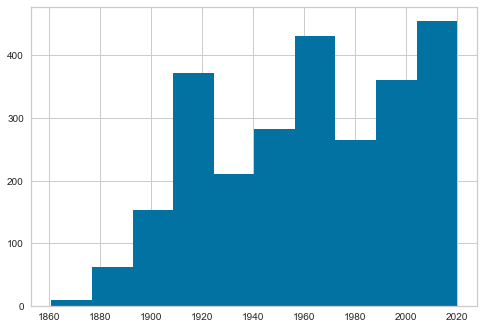

In [76]:
plt.hist(df['Year built'])

In [77]:
bin_labels_5 = [1, 2, 3, 4, 5]
df['year_built_binned'] = pd.qcut(df['Year built'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)

In [78]:
df[df['year_built_binned'] == 1]['Year built'].unique()

array([1910., 1897., 1920., 1885., 1902., 1890., 1918., 1895., 1898.,
       1913., 1916., 1922., 1911., 1905., 1900., 1906., 1908., 1921.,
       1901., 1870., 1886., 1892., 1915., 1914., 1887., 1912., 1917.,
       1899., 1919., 1909., 1880., 1891., 1903., 1884., 1893., 1904.,
       1876., 1879., 1888., 1875., 1894., 1896., 1874., 1907., 1889.,
       1867., 1861., 1869., 1868.])

In [79]:
df['year_built_binned']

0       1
1       3
2       5
3       5
4       3
       ..
2595    5
2596    3
2597    3
2598    2
2599    4
Name: year_built_binned, Length: 2600, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [80]:
upper = df['Total Price'].quantile(.02)
lower = df['Total Price'].quantile(.98)
df = df[df['Total Price'].between(upper,lower)].copy()
# df.drop(columns=['zip'],inplace=True)

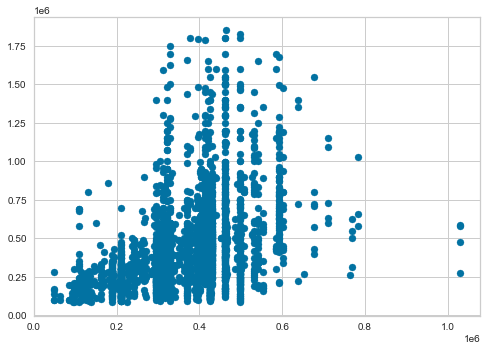

In [81]:
plt.scatter(df['median_nhv'], df['Total Price'])
plt.show()

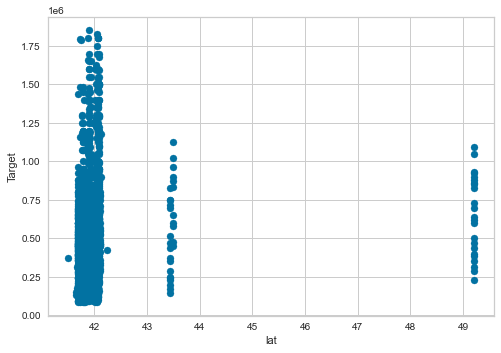

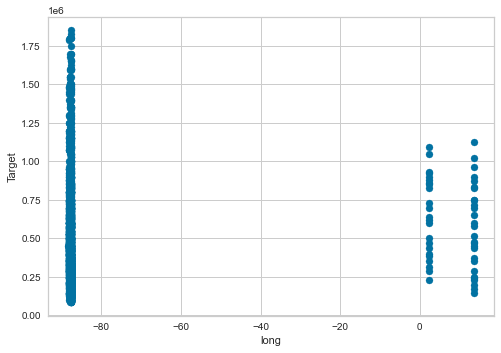

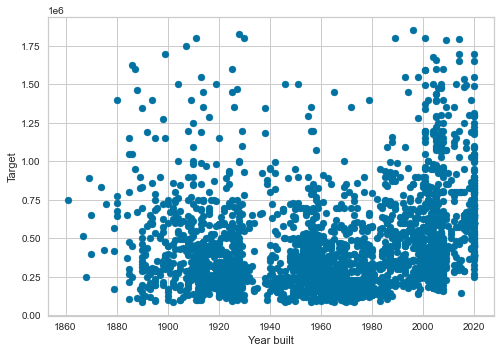

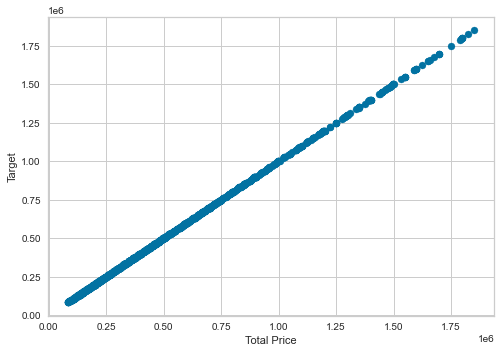

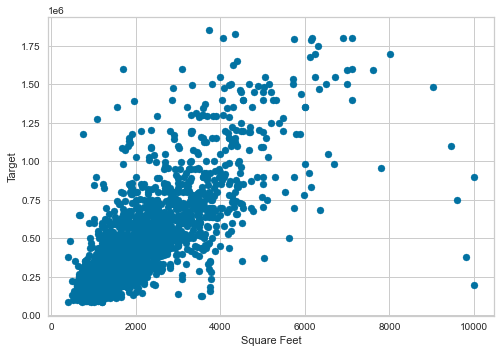

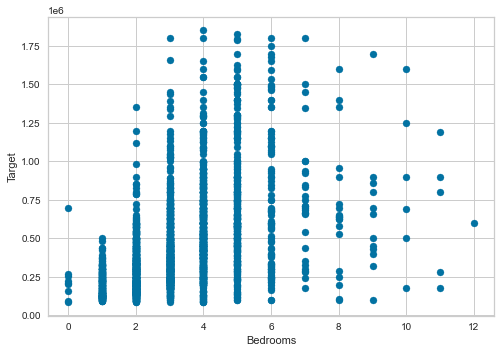

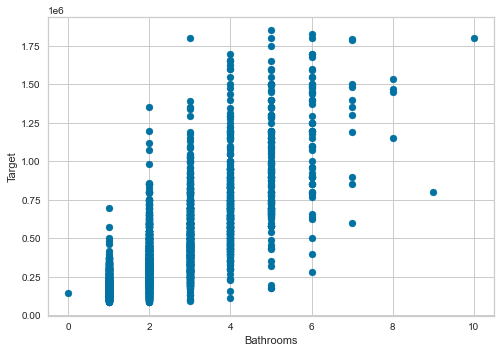

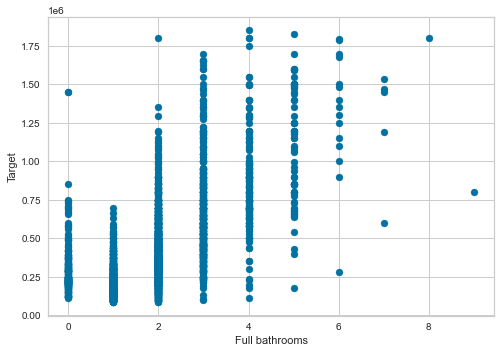

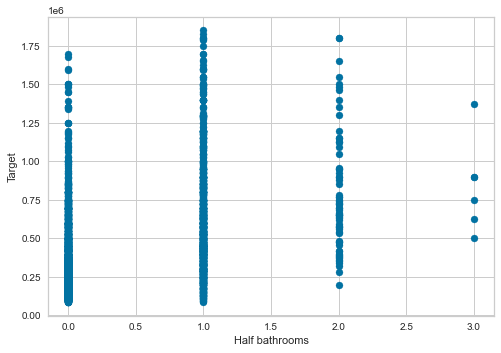

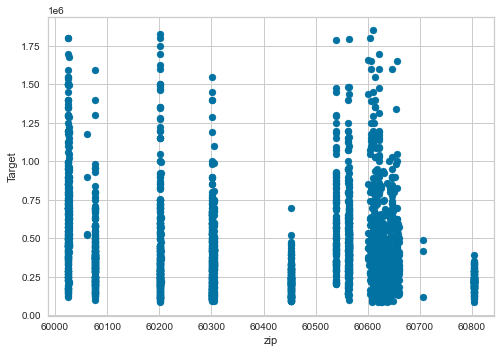

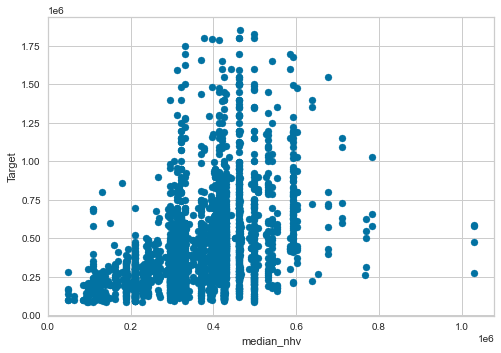

In [82]:
for col in df.select_dtypes(['float','int']).columns.to_list():
    plt.scatter(df[col], df['Total Price'])
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.show()

In [83]:
df['zip'] = df.zip.astype(str)

In [84]:
continous_data = df.select_dtypes(['float', 'int']).copy()
continous_data['year_built_binned'] = df['year_built_binned']

In [85]:
continous_data

,lat,long,Year built,Total Price,Square Feet,Bedrooms,Bathrooms,Full bathrooms,Half bathrooms,median_nhv,year_built_binned
0,41.798761,-87.588963,1910.0,249900.0,1000.0,2.0,2.0,2.0,0,396553,1
1,42.010591,-87.820290,1957.0,399000.0,1224.0,2.0,2.0,2.0,0,356353,3
2,42.006244,-87.672813,2007.0,169898.0,775.0,2.0,1.0,1.0,0,226102,5
3,41.863777,-87.624549,2008.0,489900.0,1273.0,2.0,2.0,2.0,0,376901,5
4,41.700669,-87.676906,1971.0,389000.0,2179.0,3.0,3.0,2.0,1,346385,3
...,...,...,...,...,...,...,...,...,...,...,...
2595,41.714684,-87.754065,2005.0,168999.0,1052.0,1.0,1.0,1.0,0,210544,5
2596,41.725069,-87.726728,1973.0,399900.0,3400.0,4.0,3.0,3.0,0,210544,3
2597,41.734146,-87.760216,1973.0,94500.0,852.0,2.0,1.0,1.0,0,210544,3
2598,41.714684,-87.754065,1949.0,249900.0,1343.0,3.0,2.0,1.0,1,210544,2


In [86]:
categorical_data = df.select_dtypes(['object']).copy()

In [87]:
categorical_data.columns.to_list()

['Type',
 'Heating',
 'Cooling',
 'Parking',
 'HOA',
 'Address',
 'New construction',
 'neighborhood_stats',
 'URL',
 'zip',
 'Parking_Binned',
 'address_clean']

In [88]:
# con['zip'] = df.zip.astype(str)

In [89]:
temp_df = pd.get_dummies(categorical_data[['Type',
                                           'Cooling',
                                           'HOA',
                                           'Parking_Binned',
                                           'New construction']], drop_first=True)
temp_df

,Type_Multi Family,Type_Multiple Occupancy,Type_Single Family,Type_Townhouse,Cooling_None,Cooling_Other,Cooling_Refrigeration,Cooling_Wall,HOA_Yes,Parking_Binned_Yes,New construction_ Yes
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2595,0,0,0,0,0,0,0,0,0,1,0
2596,0,0,1,0,0,0,0,0,1,1,0
2597,0,0,0,0,0,0,1,0,0,1,0
2598,0,0,1,0,0,0,0,0,1,1,0


In [90]:
lm_data = continous_data.join(temp_df)
lm_data.isna().sum().sort_values(ascending=False)

Square Feet                348
lat                          2
long                         2
Parking_Binned_Yes           0
Year built                   0
Total Price                  0
Bedrooms                     0
Bathrooms                    0
Full bathrooms               0
Half bathrooms               0
median_nhv                   0
New construction_ Yes        0
Type_Multi Family            0
Type_Multiple Occupancy      0
Type_Single Family           0
Type_Townhouse               0
Cooling_None                 0
Cooling_Other                0
Cooling_Refrigeration        0
Cooling_Wall                 0
HOA_Yes                      0
year_built_binned            0
dtype: int64

In [91]:
lm_data

,lat,long,Year built,Total Price,Square Feet,Bedrooms,Bathrooms,Full bathrooms,Half bathrooms,median_nhv,...,Type_Multiple Occupancy,Type_Single Family,Type_Townhouse,Cooling_None,Cooling_Other,Cooling_Refrigeration,Cooling_Wall,HOA_Yes,Parking_Binned_Yes,New construction_ Yes
0,41.798761,-87.588963,1910.0,249900.0,1000.0,2.0,2.0,2.0,0,396553,...,0,0,0,0,0,0,0,0,0,0
1,42.010591,-87.820290,1957.0,399000.0,1224.0,2.0,2.0,2.0,0,356353,...,0,1,0,0,0,0,0,1,1,0
2,42.006244,-87.672813,2007.0,169898.0,775.0,2.0,1.0,1.0,0,226102,...,0,0,0,0,0,0,0,0,0,0
3,41.863777,-87.624549,2008.0,489900.0,1273.0,2.0,2.0,2.0,0,376901,...,0,0,0,0,0,0,0,0,1,0
4,41.700669,-87.676906,1971.0,389000.0,2179.0,3.0,3.0,2.0,1,346385,...,0,1,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,41.714684,-87.754065,2005.0,168999.0,1052.0,1.0,1.0,1.0,0,210544,...,0,0,0,0,0,0,0,0,1,0
2596,41.725069,-87.726728,1973.0,399900.0,3400.0,4.0,3.0,3.0,0,210544,...,0,1,0,0,0,0,0,1,1,0
2597,41.734146,-87.760216,1973.0,94500.0,852.0,2.0,1.0,1.0,0,210544,...,0,0,0,0,0,1,0,0,1,0
2598,41.714684,-87.754065,1949.0,249900.0,1343.0,3.0,2.0,1.0,1,210544,...,0,1,0,0,0,0,0,1,1,0


In [92]:
lm_data.dropna(inplace=True)

In [93]:
corrs = lm_data.corr()['Total Price'].sort_values(ascending=False).to_frame().head(50)
corrs

,Total Price
Total Price,1.000000
Bathrooms,0.762376
Square Feet,0.755807
Full bathrooms,0.671727
Bedrooms,0.543302
Half bathrooms,0.436785
median_nhv,0.435114
Type_Single Family,0.278742
New construction_ Yes,0.251120
HOA_Yes,0.207290


In [94]:
features_full = corrs.index.to_list()[1::]
features_full

['Bathrooms',
 'Square Feet',
 'Full bathrooms',
 'Bedrooms',
 'Half bathrooms',
 'median_nhv',
 'Type_Single Family',
 'New construction_ Yes',
 'HOA_Yes',
 'Year built',
 'Parking_Binned_Yes',
 'lat',
 'long',
 'Type_Multiple Occupancy',
 'Type_Multi Family',
 'Type_Townhouse',
 'Cooling_Other',
 'Cooling_Refrigeration',
 'Cooling_Wall',
 'Cooling_None']

In [95]:
# sns.pairplot(test_fixed.iloc[:,0:9])

In [96]:
# plt.scatter(test_fixed['Total Price'], np.log2((test_fixed['median_nhv'])))

In [128]:
cont_features = ['Square Feet',
                 'Bedrooms',
                 'Bathrooms',
                 'Full bathrooms',
                 'Half bathrooms',
                 'median_nhv',
#                  'Bathrooms_adj',
#                  'year_built_binned'
                ]

In [129]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot


X = lm_data[cont_features]
y = lm_data['Total Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

x_mat = sm.add_constant(X_train)
lr_m = sm.OLS(y_train, x_mat)

results = lr_m.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Total Price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     616.7
Date:                Sun, 11 Oct 2020   Prob (F-statistic):               0.00
Time:                        14:59:30   Log-Likelihood:                -20202.
No. Observations:                1502   AIC:                         4.042e+04
Df Residuals:                    1495   BIC:                         4.046e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.829e+05   1.83e+04    -15.447      0.000   -3.19e+05   -2.47e+05
Square Feet       99.0845      6.216     15.941      0.000      86.892     111.277
Bedrooms        1.122e+04   4782.360      2.347      0.019    1842.538    2.06e+04
Bathrooms       8.933e+04   9956.479      8.972      0.000    6.98e+04    1.09e+05
Full bathrooms  7442.6937   7719.083      0.964      0.335   -7698.690    2.26e+04
Half bathrooms -2.684e+04   1.14e+04     -2.354      0.019   -4.92e+04   -4477.076
median_nhv         0.7365      0.040     18.251      0.000       0.657       0.816
==============================================================================
Omnibus:                      423.636   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2229.098
Skew:                           1.217   Prob(JB):                         0.00
Kurtosis:                       8.449   Cond. No.                     1.67e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.67e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7122205973291675
0.7171742114868445


In [131]:
preds = model.predict(X_test)
actuals = y_test

err = abs(preds - actuals)
err.mean()


118067.07695435637

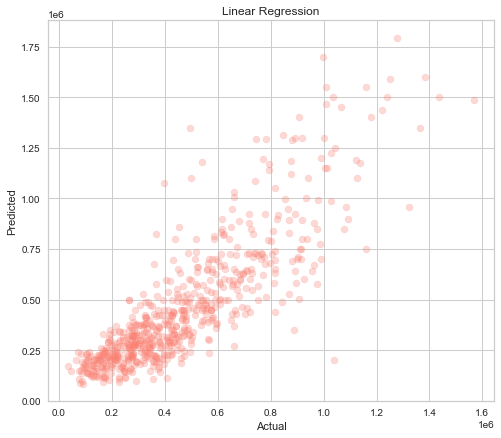

In [132]:
plt.figure(figsize=[8, 7])
plt.title('Linear Regression')
plt.scatter(model.predict(X_test), y_test,color='salmon', alpha=.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

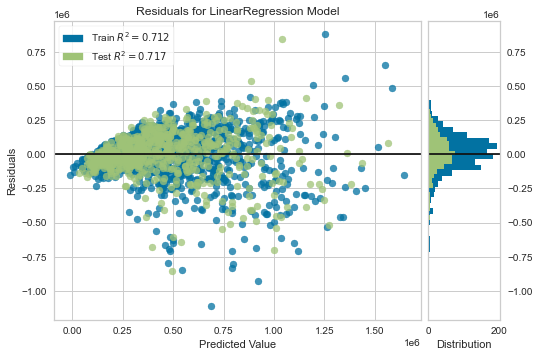

In [133]:
visualizer = ResidualsPlot(model, hist=True, qqplot=False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="Residuals1.pdf");

In [134]:
ridge_features = ['Bathrooms',
                 'Square Feet',
                 'Bedrooms',
                 'median_nhv',
                 'Type_Single Family',
                 'New construction_ Yes',
                 'HOA_Yes',
                 'year_built_binned',
                 'Parking_Binned_Yes',
                 'lat',
                 'long',
                 'Cooling_None'
                 ]

In [135]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

X = lm_data[ridge_features]
y = lm_data['Total Price']
poly_x = PolynomialFeatures(2).fit_transform(X)
s = StandardScaler(with_mean=True)
poly_scaled = s.fit_transform(poly_x)

X_train, X_test, y_train, y_test = train_test_split(poly_scaled, y, test_size=0.30, random_state=10)


In [136]:
from sklearn.linear_model import RidgeCV, LassoCV

ridge = RidgeCV()
ridge.fit(X_train, y_train)
print('training score', ridge.score(X_train, y_train))
print('testing score', ridge.score(X_test, y_test))

training score 0.7994183307323577
testing score 0.7873472426242283


In [137]:
preds = ridge.predict(X_test)
actuals = y_test
err = abs(preds - actuals)
print('Mean Absolute Error:\n{}'.format(err.mean()))

Mean Absolute Error:
93587.96557486917


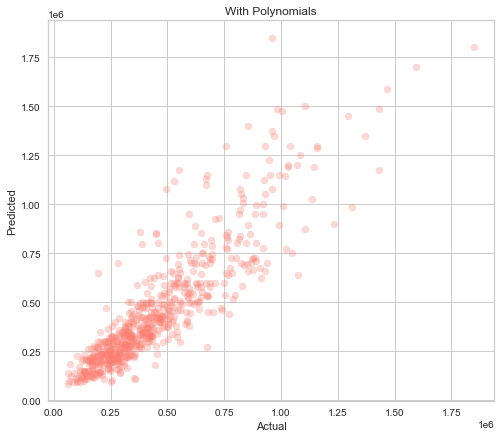

In [138]:
plt.figure(figsize=[8, 7])
plt.title('With Polynomials')
plt.scatter(ridge.predict(X_test), y_test,color='salmon', alpha=.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

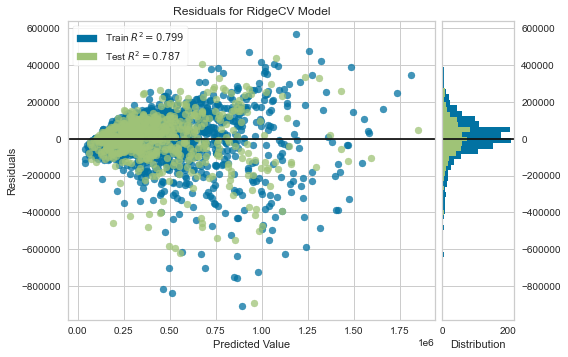

In [139]:
visualizer = ResidualsPlot(ridge, hist=True, qqplot=False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

### This is for training a Random Forest Regressor
#### going to format the addresses so we can get gps coordinates for properties

In [140]:
df.Address

0               5329 S Harper Ave #2, Chicago, IL 60615
1                   7144 N Ozark Ave, Chicago, IL 60631
2          1673 W Farwell Ave APT 1S, Chicago, IL 60626
3       1400 S Michigan Ave APT 2203, Chicago, IL 60605
4                 10606 S Leavitt St, Chicago, IL 60643
                             ...                       
2595        9440 S 51st Ave APT 502, Oak Lawn, IL 60453
2596              9246 S Keeler Ave, Oak Lawn, IL 60453
2597         4929 W 87th St APT 3NW, Oak Lawn, IL 60453
2598                 9117 S 53rd Ct, Oak Lawn, IL 60453
2599         4003 W 105th St APT 3W, Oak Lawn, IL 60453
Name: Address, Length: 2497, dtype: object

In [141]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


# model = LinearRegression()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [142]:
tree_df = df.copy()

In [143]:
tree_df.dtypes

lat                    float64
long                   float64
Type                    object
Year built             float64
Heating                 object
Cooling                 object
Parking                 object
HOA                     object
Total Price            float64
Address                 object
Square Feet            float64
New construction        object
Bedrooms               float64
Bathrooms              float64
Full bathrooms         float64
neighborhood_stats      object
URL                     object
Half bathrooms           int64
zip                     object
median_nhv               int64
Parking_Binned          object
address_clean           object
year_built_binned     category
dtype: object

In [144]:
tree_cont = tree_df.select_dtypes(['float', 'int', 'category'])
tree_cat = tree_df.select_dtypes(['object'])

In [145]:
# tree_df['year_built_binned']
tree_df_cat = tree_cat[['Type','Cooling','HOA','Parking_Binned','New construction']]
tree_df_cat_enc = pd.get_dummies(tree_df_cat, drop_first=True)

In [146]:
model_data = tree_cont.join(tree_df_cat_enc).dropna().copy()
model_data.head(5)

,lat,long,Year built,Total Price,Square Feet,Bedrooms,Bathrooms,Full bathrooms,Half bathrooms,median_nhv,...,Type_Multiple Occupancy,Type_Single Family,Type_Townhouse,Cooling_None,Cooling_Other,Cooling_Refrigeration,Cooling_Wall,HOA_Yes,Parking_Binned_Yes,New construction_ Yes
0,41.798761,-87.588963,1910.0,249900.0,1000.0,2.0,2.0,2.0,0,396553,...,0,0,0,0,0,0,0,0,0,0
1,42.010591,-87.820290,1957.0,399000.0,1224.0,2.0,2.0,2.0,0,356353,...,0,1,0,0,0,0,0,1,1,0
2,42.006244,-87.672813,2007.0,169898.0,775.0,2.0,1.0,1.0,0,226102,...,0,0,0,0,0,0,0,0,0,0
3,41.863777,-87.624549,2008.0,489900.0,1273.0,2.0,2.0,2.0,0,376901,...,0,0,0,0,0,0,0,0,1,0
4,41.700669,-87.676906,1971.0,389000.0,2179.0,3.0,3.0,2.0,1,346385,...,0,1,0,0,0,0,0,1,1,0


In [147]:
tree_features = ['Bathrooms',
                 'Square Feet',
                 'Bedrooms',
                 'median_nhv',
                 'Type_Single Family',
                 'New construction_ Yes',
                 'HOA_Yes',
                 'year_built_binned',
                 'Parking_Binned_Yes',
                 'lat',
                 'long',
                 'Cooling_None'
                 ]

In [148]:
X = model_data[tree_features]
y = model_data['Total Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1000)

In [149]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=5, random_state=60)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=60)

In [150]:
regr.score(X_train, y_train)

0.8464798818817381

In [151]:
regr.score(X_test, y_test)

0.7779663074535377

In [152]:
preds = regr.predict(X_test)
actuals = y_test
err = abs(preds - actuals)
err.mean()

98217.84824785666

Text(0, 0.5, 'Predicted')

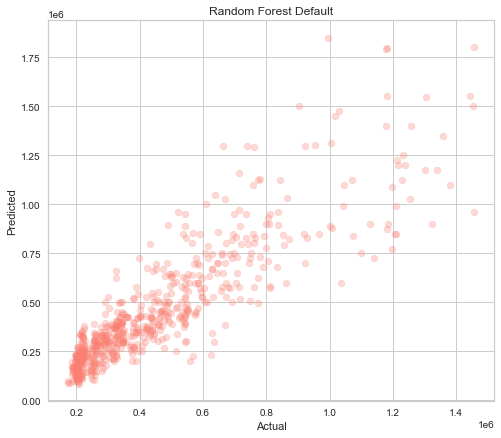

In [153]:
plt.figure(figsize=[8, 7])
plt.title('Random Forest Default')
plt.scatter(regr.predict(X_test), y_test,color='salmon', alpha=.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

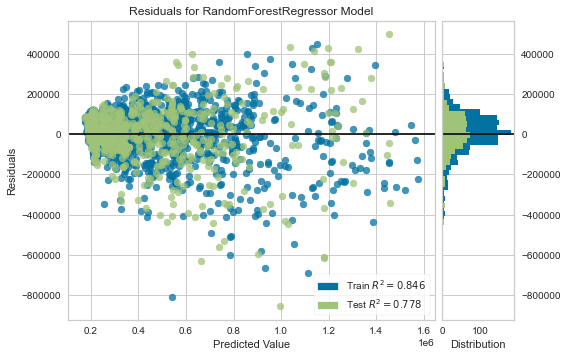

In [154]:
visualizer = ResidualsPlot(regr, hist=True, qqplot=False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="Residuals3.pdf");


In [257]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score

rfr = RandomForestRegressor(random_state=1)

max_depth_range = range(1, 8)
leaf_range = [2, 3, 5, 10]
n_estimators = [100]
max_features = ['auto', 'sqrt']
# min_samples_split = [5, 10, 15, 100]


params = dict(max_depth=max_depth_range,
              min_samples_leaf=leaf_range, 
#               min_samples_split=min_samples_split,
              n_estimators=n_estimators,
              max_features=max_features)

rf_grid = GridSearchCV(rfr,
                       params,
                       cv=5,
                       return_train_score=True,
                       n_jobs=-1)

rf_grid.fit(X_train, y_train)
print("Random Forest score:", rf_grid.best_score_)
print("Random Forest (best parameters)", rf_grid.best_params_)

Random Forest score: 0.7985221327520374
Random Forest (best parameters) {'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}


In [156]:
rfr_final = RandomForestRegressor(max_depth=7,
                                  min_samples_leaf=2,
                                  n_estimators=200,
                                  max_features='sqrt')

rfr_final.fit(X_train, y_train)
print('training score', rfr_final.score(X_train, y_train))
print('testing score', rfr_final.score(X_test, y_test))


training score 0.8796732339768721
testing score 0.8257937346142465


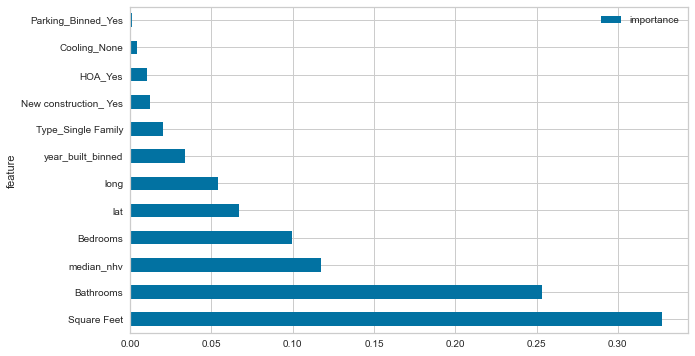

In [157]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = rfr_final.feature_importances_
features.sort_values(by=['importance'], ascending=False, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh', figsize=(10, 6))
plt.savefig('feature_importances.pdf')

In [158]:
preds = rfr_final.predict(X_test)
actuals = y_test

err = abs(preds - actuals)
err.mean()


84324.57396555894

Text(0, 0.5, 'Predicted')

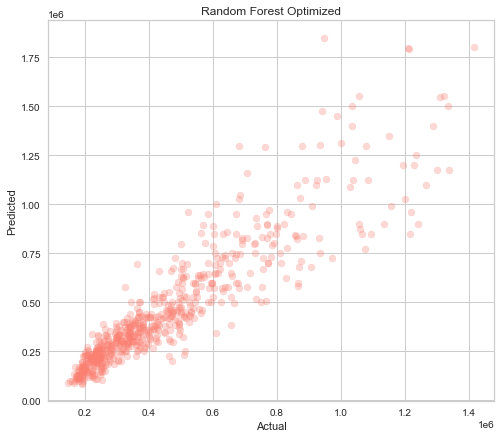

In [162]:
plt.figure(figsize=[8, 7])
plt.title('Random Forest Optimized')
plt.scatter(rfr_final.predict(X_test), y_test,color='salmon', alpha=.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

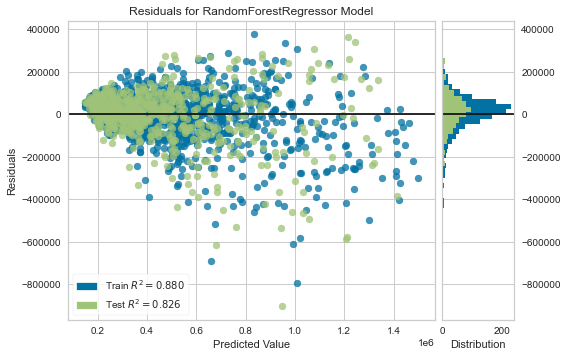

In [160]:
visualizer = ResidualsPlot(rfr_final, hist=True, qqplot=False)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="Residuals4.pdf");
# visualizer.savefig('Residuals4.pdf')

In [97]:
# plt.figure(figsize=[8, 7])
# plt.title('RFR')
# plt.scatter(y_test, rfr_final.predict(X_test),color='firebrick', alpha=.3)
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.axis('equal')